# meng 21200 pset 7

### init

In [1]:
import numpy as np
from scipy.optimize import golden, minimize_scalar, linprog
from random import uniform
import matplotlib.pyplot as plt
from sympy import symbols, solve, diff
plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams.update({'font.size': 6})

### problem 1

a

In [2]:
def length(x, d=6, h=6):
    return (x + d) * np.sqrt(x ** 2 + h ** 2) / x

In [3]:
def gss(lower, upper, tol=0.0001):
    while abs(upper - lower) > tol:
        l = (upper - lower) * 0.5 * (np.sqrt(5) - 1)
        lowerX = lower + l
        upperX = upper - l

        lowerL = length(lowerX)
        upperL = length(upperX)
        if lowerL < upperL:
            lower = upperX
        else:
            upper = lowerX
    return (lower + upper) / 2


In [4]:
ans = round(gss(1, 100), 3)
print(f'min length of ladder: {ans}')

min length of ladder: 6.0


b

In [5]:
ans = round(golden(length, brack=(0.1, 10)), 3)
print(f'min length of ladder: {ans}')

min length of ladder: 6.0


c

In [6]:
ans = round(minimize_scalar(length, bracket=(0.1, 10), method='Golden').x, 3)
print(f'min length of ladder: {ans}')

min length of ladder: 6.0


d

Text(0, 0.5, 'min l (m)')

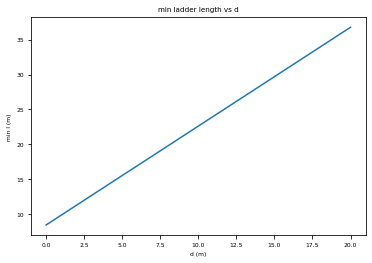

In [7]:
dlist = np.linspace(0, 20)
llist = []
for d in dlist:
    x = minimize_scalar(length, bracket=(0.1, 100), method='Golden').x
    llist.append(length(x, d))

plt.figure(figsize=(6, 4))
plt.plot(dlist, llist)
plt.title('min ladder length vs d')
plt.xlabel('d (m)')
plt.ylabel('min l (m)')

### problem 2

a

1 ) steepest descent

assume step size of $h = 0.1$\
\
$x_0 = y_0 = 1$\
$at (1, 1), \frac{\partial f}{\partial x} = 10x - 5y - 1, \frac{\partial f}{\partial y} = 3.5y - x$\
$x = x_0 - \frac{\partial f}{\partial x}h = 1-4h$
$y = y_0 - \frac{\partial f}{\partial y}h = 1+1.5h$
sub $h = 0.1$, we get $(0.6, 1.15)$


2 ) optimal steepest descent

let $g(h) = f(1 - 4h, 1 + 1.5h)$
then $g(h) = 5(1-4h)^2 - r(1-4)(1+1.5h)+2.5(1+1.5h)^2-(1-4h)-1.15(1+1.5h)=115.625h^2-18.25h$
$\frac{dg}{dh}=231.25h-18.25$
for $\frac{dg}{dh}$ to equal zero, $h=0.0789$
thus $x=1-4h=0.684$, $y=1+1.5h=1.12$
we get $(0.684, 1.12)$

b

In [8]:
def dx(x, y):
    return 10 * x - 5 * y - 1
def dy(x, y):
    return -5 * x + 5 * y - 1.5

def sd(x0, y0, h=0.1, maxIt=100000, tol=0.00001):
    x = x0
    y = y0
    xlist = [x0]
    ylist = [y0]

    for i in range(maxIt):
        x = x - h * dx(x, y)
        y = y - h * dy(x, y)
        xlist.append(x)
        ylist.append(y)
        if abs(dx(x, y)) < tol and abs(dy(x, y)) < tol:
            break

    return xlist, ylist, i

In [9]:
def f_(x, y):
    return 5 * x ** 2 - 5 * x * y + 2.5 * y ** 2 - x - 1.5 * y

def osd(x0, y0, maxIt=100000, tol=0.00001):
    x_ = x0
    y_ = y0
    xlist = [x0]
    ylist = [y0]

    x, y, h = symbols('x, y, h')
    f = -f_(x, y)
    dx = diff(f, x)
    dy = diff(f, y)

    for i in range(maxIt):
        dx_ = dx.subs([(x, x_), (y, y_)]) * h
        dy_ = dy.subs([(x, x_), (y, y_)]) * h
        g = f.subs([(x, dx_ + x_), (y, dy_ + y_)])

        soln = solve(diff(g, h))[0]
        x1 = x_ + dx_.subs(h, soln)
        y1 = y_ + dy_.subs(h, soln)
        x_, y_ = x1, y1
        xlist.append(x_)
        ylist.append(y_)

        if abs(x_ - xlist[-2]) < tol and abs(y_ - ylist[-2]) < tol:
            break

    return xlist, ylist, i

xlist1, ylist1, n = sd(1, 1)
print(f'steepest descent: {round(f_(xlist1[-1], ylist1[-1]), 10)} at ({round(xlist1[-1], 10)},{round(ylist1[-1], 10)}), achieved in {n} iterations')

xlist2, ylist2, n = osd(1, 1)
print(f'optimal steepest descent: {round(f_(xlist2[-1], ylist2[-1]), 10)} at ({round(xlist2[-1], 10)},{round(ylist2[-1], 10)}), achieved in {n} iterations')

steepest descent: -0.85 at (0.5000031784,0.8000047676), achieved in 36 iterations
optimal steepest descent: -0.8500000000 at (0.5000023443,0.8000040493), achieved in 12 iterations


c

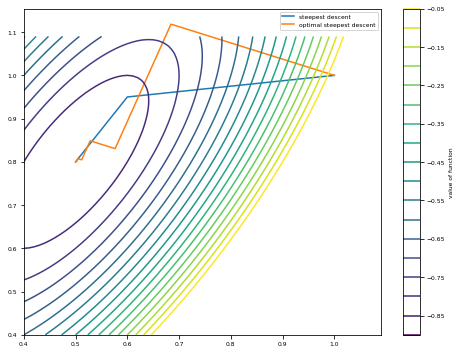

In [10]:
fig, ax = plt.subplots()
ax.plot(xlist1, ylist1, label="steepest descent")
ax.plot(xlist2, ylist2, label="optimal steepest descent")
ax.legend()

x = np.arange(0.4, 1.1, 0.01)
y = np.arange(0.4, 1.1, 0.01)
levels = np.arange(-0.9, 0, 0.05)

X, Y = np.meshgrid(x, y)
z = f_(X, Y)

cont = ax.contour(x, y, z, levels=levels)
plt.colorbar(cont, ax=ax, label="value of function")

### problem 3

a

Let $x_1$, $x_2$ be the flow rates in the two channels respectively

Maximise: $profit = (3.2\times (1-0.3)+4-1.1)x_1 + (3.2\times (1-0.2) + 3 -1.4)x_2=5.14
x_1+4.16x_2$
Subject to: $x_1+x_2\le 1.4\times10^6; |x_1-x_2|\le 0.56\times 10^6; x_1, x_2 \ge 0$

b

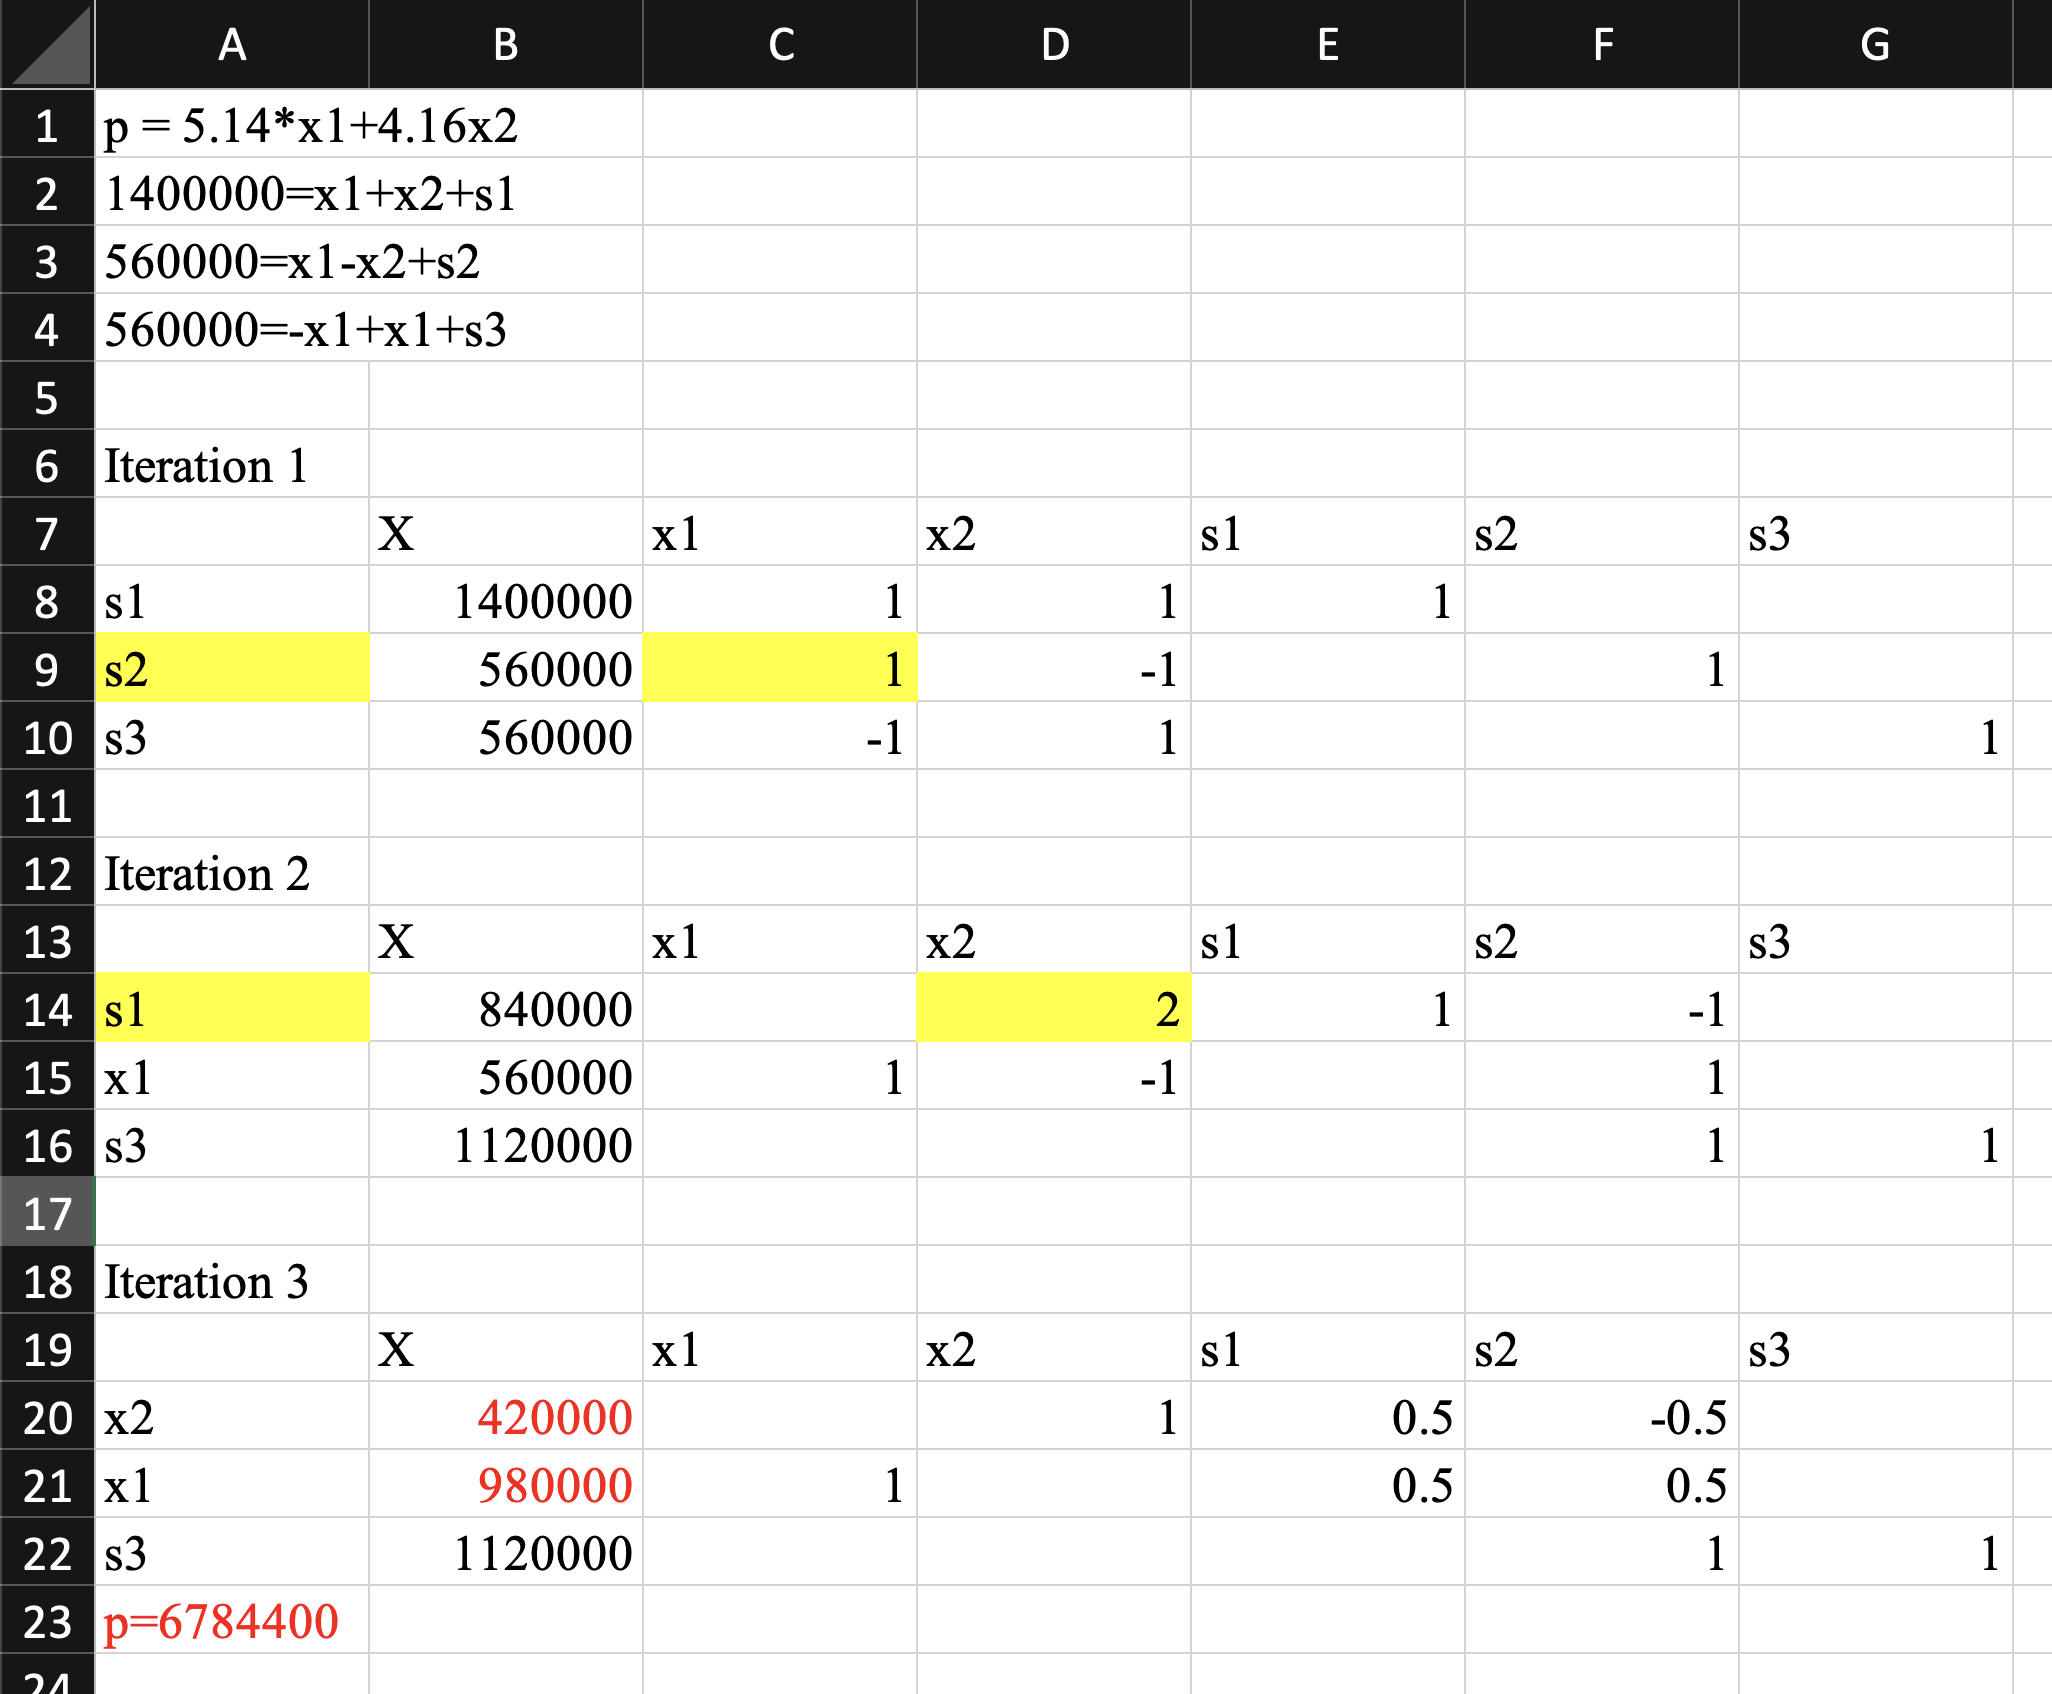

c

In [11]:
cond = [-5.14, -4.16]
A = [[1, 1], [1, -1], [-1, 1]]
b = [1.4e6, 0.56e6, 0.56e6]
soln = linprog(cond, A_ub=A, b_ub=b)
print(f'max profit = {round(-soln.fun, 0)} at x1 = {round(soln.x[0], 0)} and x2 = {round(soln.x[1], 0)}')

max profit = 6784400.0 at x1 = 980000.0 and x2 = 420000.0


d

From the profit equation, we can see that channel 1 clearly generates more profit per unit flow rate. Therefore, to further increase profit, Splish County should loosen the 40% maximum flow rate difference, or even remove it completely.

e

- water rights: 7 US states and Mexico
- river flow
- water consumption
- level of reservoir storage

### problem 4


Write your own code to implement the random search method and test your code to find the global minimum of the following  function $f(x, y)$.  Report your solution as the $x^*$ and $y^*$ position of the mimimum, as well as the value of function at the mimimum $f(x^*, y^*)$. 

In [12]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'
plt.rcParams['figure.figsize'] = [8,6]
plt.rcParams.update({'font.size':18})

In [13]:
def gauss(x, y):
    height = 5
    width = 1
    return -height * np.exp(-1/width*(x**2 + y**2))

def parabola(x, y):
    width = 20
    return 1/width*(x**2 + y**2)

def wave(x, y):
    omega = 3
    amplitude = 1
    return amplitude*np.cos(omega*x)*np.cos(omega*y)

def f(x,y):
    return  wave(x,y) + gauss(x,y) + parabola(x,y)

(-4.759988869075444, 4.759988869075444, -4.759988869075444, 4.759988869075444)

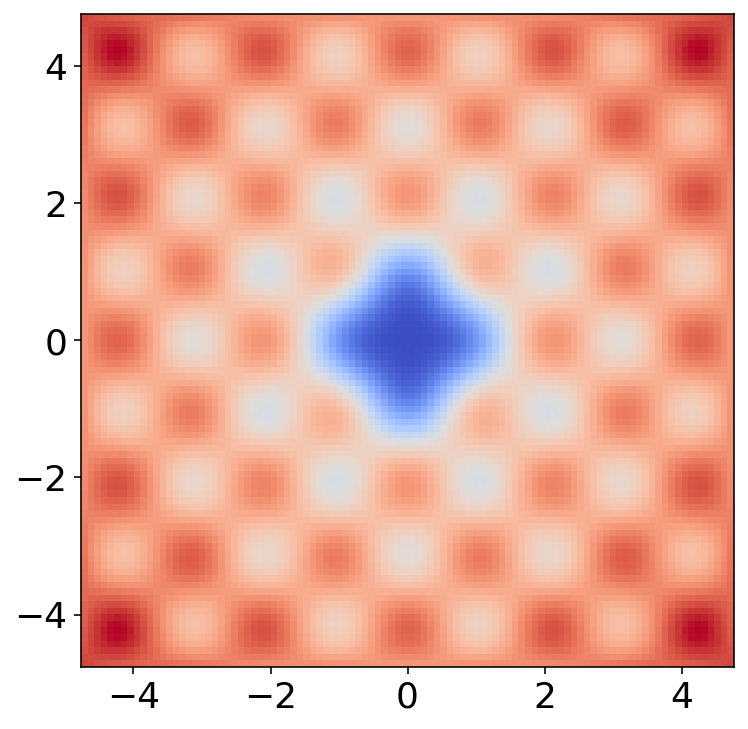

In [14]:
w = 1.5
h = 1.5

xmin = -w*np.pi
xmax = w*np.pi
ymin = -h*np.pi
ymax = h*np.pi
xvec = np.linspace(xmin, xmax, 100)
yvec = np.linspace(ymin, ymax, 100)

X, Y = np.meshgrid(xvec, yvec)

plt.pcolormesh(X, Y, f(X,Y), cmap='coolwarm')
plt.axis('square')

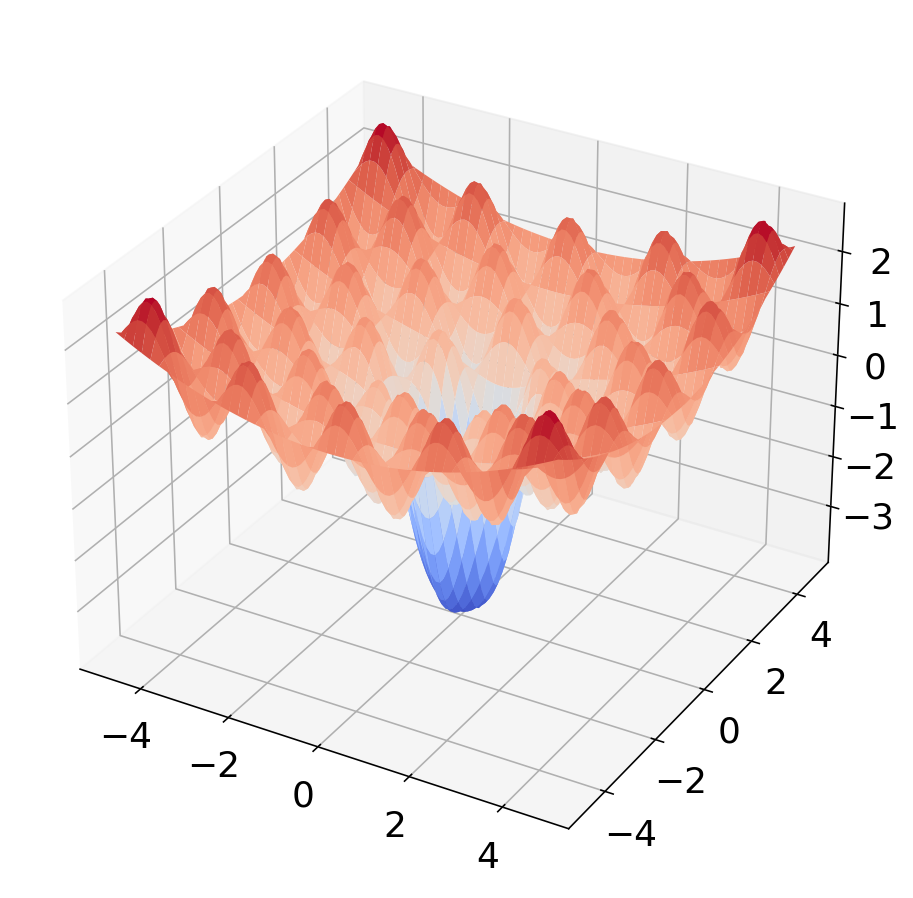

In [15]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X,Y,f(X,Y),cmap='coolwarm')

In [16]:
def random_search(N, obj_fn):
    '''
    implement random search
    N: number of random guesses
    obj_fn: (callable), function which to sample
    '''
    fMin = 100
    for i in range(N):
        x = xmin + xmax * uniform(0, 2)
        y = ymin + ymax * uniform(0, 2)
        val = obj_fn(x, y)
        if val < fMin:
            xAns = x
            yAns = y
            fMin = val
        
    return xAns, yAns, fMin

In [17]:
x, y, fMin = random_search(1000000, f)
print(f'coordinates: ({round(x, 6)}, {round(y, 6)})')
print(f'value: {round(fMin, 6)}')

coordinates: (0.007667, -0.004629)
value: -3.999956
